### **Objective:**
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [3]:
retail_df = pd.read_csv("/content/Sales_data.csv", encoding='windows-1250')
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


1.2. Display the top 10 rows of the dataframe:

In [4]:
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1.3. Check for missing values:



In [5]:
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


1.4. Convert the InvoiceDate column to datetime format:



In [6]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [7]:
retail_df['TotalPrice'] = retail_df['UnitPrice'] * retail_df['Quantity']
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [8]:
retail_df['StockCode'].nunique()

4070

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [9]:
retail_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
StockCode,
22197,56450
84077,53847
85099B,47363
85123A,38830
84879,36221
21212,36039
23084,30646
22492,26437
22616,26315


2.3. How many unique customers are there in the dataset?



In [10]:
retail_df['CustomerID'].nunique()

4372

2.4. Which country has the maximum number of unique customers?



In [11]:
print(retail_df.groupby('Country')['CustomerID'].nunique().idxmax())
print(retail_df.groupby('Country')['CustomerID'].nunique().max())

United Kingdom
3950


2.5. Visualize the distribution of 'TotalPrice' using a histogram.



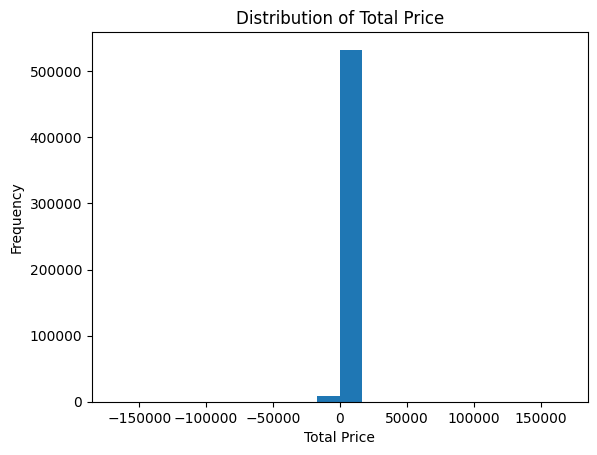

In [12]:
import matplotlib.pyplot as plt
retail_df['TotalPrice'].plot(kind='hist', bins=20)
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Price')
plt.show()

## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [13]:
retail_df.groupby('Country')['TotalPrice'].sum()

,TotalPrice
Country,
Australia,137077.270
Austria,10154.320
Bahrain,548.400
Belgium,40910.960
Brazil,1143.600
Canada,3666.380
Channel Islands,20086.290
Cyprus,12946.290
Czech Republic,707.720


3.2. Identify the month in which the sales were highest.



In [14]:
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
print(retail_df.groupby('Month')['TotalPrice'].sum().idxmax())

11


3.3. Compute the average unit price per product.



In [15]:
retail_df.groupby('StockCode')['UnitPrice'].mean()

,UnitPrice
StockCode,
10002,1.056849
10080,0.376667
10120,0.210000
10123C,0.487500
10123G,0.000000
...,...
gift_0001_20,15.038000
gift_0001_30,21.941250
gift_0001_40,33.566667


3.4. Compute the total quantity sold per customer.



In [16]:
retail_df.groupby('CustomerID')['Quantity'].sum()

,Quantity
CustomerID,
12346.0,0
12347.0,2458
12348.0,2341
12349.0,631
12350.0,197
...,...
18280.0,45
18281.0,54
18282.0,98


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



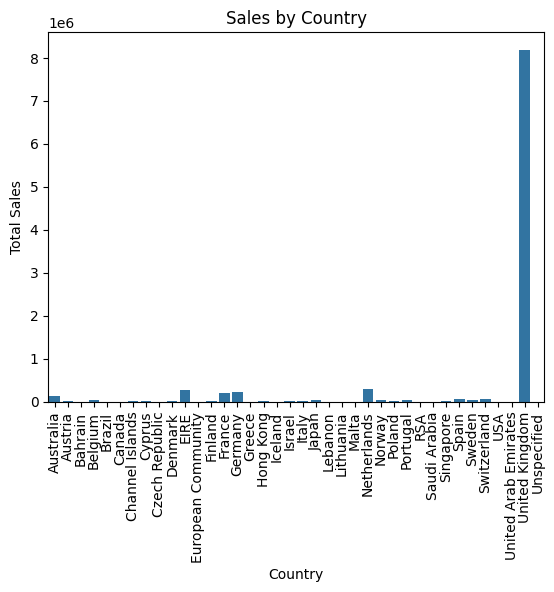

In [17]:
import seaborn as sns
sns.barplot(x=retail_df.groupby('Country')['TotalPrice'].sum().index, y=retail_df.groupby('Country')['TotalPrice'].sum().values)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')
plt.xticks(rotation=90)
plt.show()

4.2. Plot a line graph to showcase the trend of sales over time.



In [18]:
retail_df['Year'] = retail_df['InvoiceDate'].dt.year
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Day'] = retail_df['InvoiceDate'].dt.day
retail_df['Hour'] = retail_df['InvoiceDate'].dt.hour
retail_df['Minute'] = retail_df['InvoiceDate'].dt.minute
retail_df['Second'] = retail_df['InvoiceDate'].dt.second
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,Day,Hour,Minute,Second
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,2011,9,12,50,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,2011,9,12,50,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9,12,50,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9,12,50,0


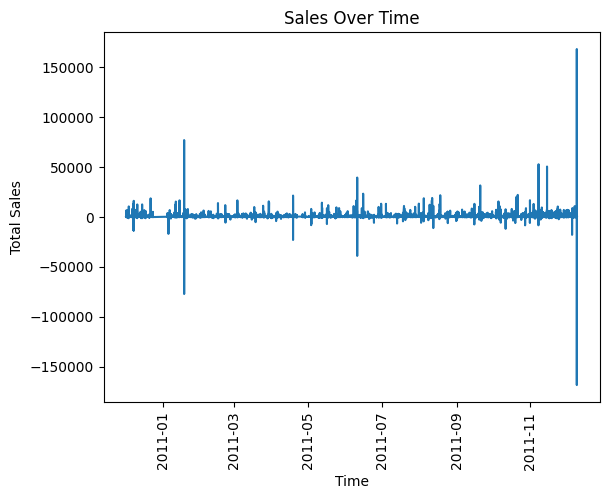

In [19]:
time_grouped_sales = retail_df.groupby(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'])['TotalPrice'].sum().reset_index()
time_grouped_sales['Datetime'] = pd.to_datetime(time_grouped_sales[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])

sns.lineplot(x=time_grouped_sales['Datetime'], y=time_grouped_sales['TotalPrice'])
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=90)
plt.show()

4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



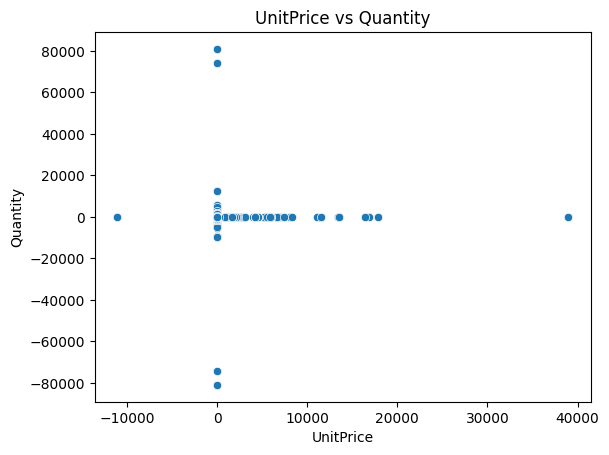

In [20]:
sns.scatterplot(x=retail_df['UnitPrice'], y=retail_df['Quantity'])
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.title('UnitPrice vs Quantity')
plt.show()

4.4. Plot a heatmap to display the correlation between numeric columns.



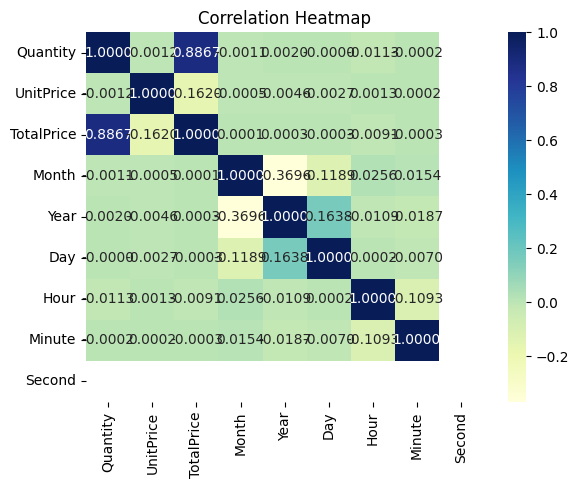

In [21]:
numeric_cols = retail_df.select_dtypes(include=np.number).drop(columns=['CustomerID'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('Correlation Heatmap')
plt.show()

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



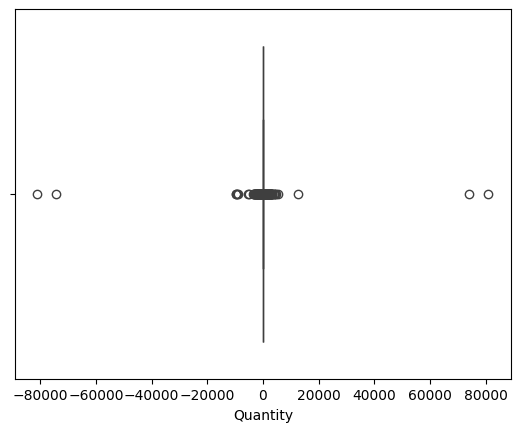

In [22]:
sns.boxplot(x=retail_df['Quantity'])
plt.show()

5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).



In [23]:
retail_df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

,TotalPrice
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
...,...
12503.0,-1126.00
17603.0,-1165.30
14213.0,-1192.20


5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



In [24]:
retail_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)

,Quantity
StockCode,
22197,56450
84077,53847
85099B,47363
85123A,38830
84879,36221


# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [25]:
retail_df['Year'] = retail_df['InvoiceDate'].dt.year
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Day'] = retail_df['InvoiceDate'].dt.day
retail_df['Hour'] = retail_df['InvoiceDate'].dt.hour
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,Day,Hour,Minute,Second
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,2011,9,12,50,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,2011,9,12,50,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9,12,50,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9,12,50,0


6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [26]:
retail_df['ReturnFlag'] = retail_df['Quantity'].apply(lambda x: 1 if x < 0 else 0)
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,Day,Hour,Minute,Second,ReturnFlag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,8,26,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,8,26,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,2011,9,12,50,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,2011,9,12,50,0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9,12,50,0,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9,12,50,0,0


## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [27]:
today = retail_df['InvoiceDate'].max()
rfm = retail_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

7.2. Normalize the RFM matrix with StandardScaler:

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

In [29]:
from sklearn.cluster import KMeans
wcss = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=42)
wcss.fit(rfm_scaled)

KMeans(n_clusters=10, n_init=10, random_state=42)

## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

x = retail_df[['UnitPrice', 'Quantity']]
y = retail_df['ReturnFlag']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159356
           1       1.00      1.00      1.00      3217

    accuracy                           1.00    162573
   macro avg       1.00      1.00      1.00    162573
weighted avg       1.00      1.00      1.00    162573



8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Select features and target
features = ['UnitPrice', 'Quantity', 'Country', 'ReturnFlag', 'Month', 'Day', 'Hour', 'Year']
target = 'TotalPrice'

# Drop rows with missing values in the selected features or target
regression_df = retail_df[features + [target]].dropna().copy()

# Define preprocessing steps for categorical features
categorical_features = ['Country']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Split data into training and test sets
X = regression_df[features]
y = regression_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 17.44243363096268
Root Mean Squared Error (RMSE): 215.17362101412772
R-squared (R^2): 0.8008125958894646


## 9. Association Rule Mining:



- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.

- 9.2 Based on the rules, suggest product bundling strategies to the retail store.:

In [32]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

basket = retail_df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convert quantities to 1 if greater than 0, otherwise 0
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(basket_binary, min_support=0.025, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Advanced EDA Techniques:

11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

In [35]:
products = retail_df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
products['cum_pct'] = products['TotalPrice'].cumsum() / products['TotalPrice'].sum() * 100
products[products['cum_pct'] <= 80]
print("Top Products (Pareto 20%):")
print(products[products['cum_pct'] <= 80])

#Pareto Analysis for Customers
customers = retail_df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
customers['cum_pct'] = customers['TotalPrice'].cumsum() / customers['TotalPrice'].sum() * 100
customers[customers['cum_pct'] <= 80]
print("Top Customers (Pareto 20%):")
print(customers[customers['cum_pct'] <= 80])

Top Products (Pareto 20%):
    StockCode  TotalPrice    cum_pct
0         DOT   206245.48   2.115827
1       22423   164762.19   3.806086
2       47566    98302.98   4.814555
3      85123A    97894.50   5.818833
4      85099B    92356.03   6.766293
..        ...         ...        ...
731     22165     3315.45  79.838640
732    84032A     3308.28  79.872578
733     22079     3298.89  79.906421
734     22855     3289.23  79.940165
735     23239     3283.69  79.973851

[736 rows x 3 columns]
Top Customers (Pareto 20%):
      CustomerID  TotalPrice    cum_pct
0        14646.0   279489.02   3.367311
1        18102.0   256438.49   6.456907
2        17450.0   187482.17   8.715710
3        14911.0   132572.62  10.312958
4        12415.0   123725.45  11.803614
...          ...         ...        ...
1165     16762.0     1501.38  79.917566
1166     17571.0     1498.51  79.935620
1167     16279.0     1496.68  79.953652
1168     13320.0     1491.70  79.971624
1169     15916.0     1491.24  79.9895

12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

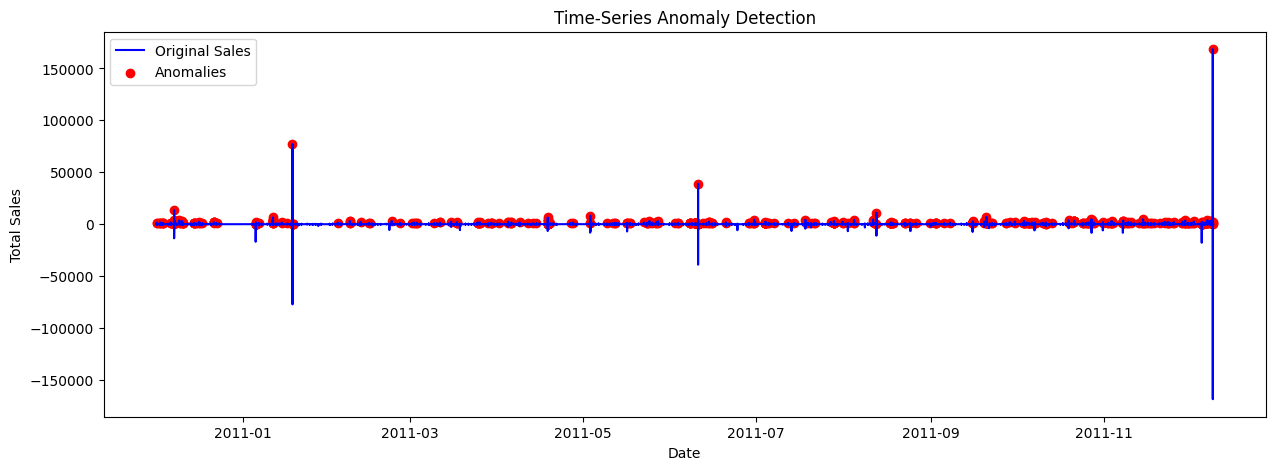

In [37]:
sales = retail_df.sort_values('InvoiceDate')

sales['RollingMean'] = sales['TotalPrice'].rolling(window=30).mean()
threshold = sales['TotalPrice'].std() * 1.96
anomalies = sales[sales['TotalPrice'] > sales['RollingMean'] + threshold]

plt.figure(figsize=(15,5))
plt.plot(sales['InvoiceDate'], sales['TotalPrice'], color='blue', label='Original Sales')
plt.scatter(anomalies['InvoiceDate'], anomalies['TotalPrice'], color='red', label='Anomalies')
plt.title("Time-Series Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

# Advanced Modeling Techniques:

13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

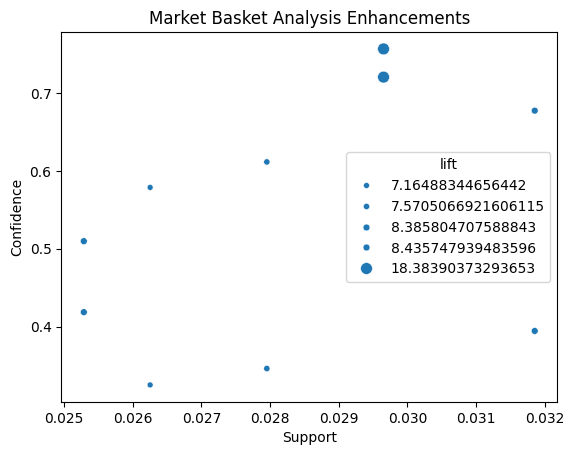

In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

top_rules = rules[(rules['confidence'] > 0.01)]
sns.scatterplot(x='support', y='confidence', size='lift', data=top_rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Market Basket Analysis Enhancements')
plt.show()

## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

user_product = sales.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)
user_product_similarity = cosine_similarity(user_product)

def recommend_products(user_id, user_product_similarity=user_product_similarity):
    idx = user_product.index.get_loc(user_id)
    sim_scores = list(enumerate(user_product_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    user_idx = sim_scores[1][0]
    similar_user_products = user_product.iloc[user_idx]
    recommended_products = similar_user_products[similar_user_products > 0].index.tolist()
    return recommended_products

print(recommend_products(retail_df['CustomerID'].iloc[0]))

['22168', '22170', '22171', '40003', '71038', '82482', '82494L', '85123A']


## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

In [43]:
from sklearn.linear_model import LogisticRegression

retail_df['LastPurchase'] = retail_df.groupby('CustomerID')['InvoiceDate'].transform('max')
max_date = retail_df['InvoiceDate'].max()
retail_df['Churn'] = (max_date - retail_df['LastPurchase']).dt.days > 180

features = ['UnitPrice', 'Quantity', 'ReturnFlag']
target = 'Churn'

X_train, X_test, y_train, y_test = train_test_split(retail_df[features], retail_df[target], test_size=0.3, random_state=42)
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98    155993
        True       0.00      0.00      0.00      6580

    accuracy                           0.96    162573
   macro avg       0.48      0.50      0.49    162573
weighted avg       0.92      0.96      0.94    162573



## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.

In [46]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   2.4s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   3.4s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   2.8s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   3.7s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   2.1s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.960 total time=   2.2s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.960 total time=   2.2s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.960 total time=   3.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.960 total time=   5.1s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.960 total time=   2.2s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.960 total time=   2.0s
[CV 2/5] END ..................C=10, penalty=l2;,